In [1]:
#Importing required modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the Dataset obtained after Data Cleaning, Interpolation and Smoothening in MATLAB Interpolation.mlx file.
df = pd.read_csv(r'AQI.csv')

In [3]:
#Printing the first 5 rows.
df.head()

,Population,Mean_1,Mean_2,Mean_3,Mean_4,Variance_1,Variance_2,Variance_3,Variance_4,Skewness_1,Skewness_2,Skewness_3,Skewness_4,AQI
0,130000.0,10.848,6.7859,8831.2,271.95,1000.00,442.69,700000000.0,816000.0,7.8995,8.8697,3.4706,6.8640,76
1,130000.0,10.842,6.7367,8853.9,272.14,994.20,433.32,717000000.0,815000.0,7.8764,8.8707,3.6495,6.8584,75
2,131000.0,10.836,6.6891,8875.8,272.31,988.50,424.20,734000000.0,813000.0,7.8541,8.8716,3.8238,6.8524,73
3,131000.0,10.829,6.6432,8896.9,272.49,982.92,415.33,750000000.0,812000.0,7.8329,8.8722,3.9936,6.8461,72
4,131000.0,10.822,6.5989,8917.4,272.65,977.46,406.71,765000000.0,811000.0,7.8125,8.8728,4.1589,6.8394,72


In [4]:
#Applying Standardscalar for scaling the features.
scaler = StandardScaler()
scaler.fit(df.drop('AQI',axis=1))
scaled_features = scaler.transform(df.drop('AQI',axis=1))
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.533032,0.164161,0.000256,0.413112,0.096534,2.008706,2.720817,-0.420218,0.983705,1.383485,1.695244,-1.888269,0.512972
1,-0.533032,0.160906,-0.033754,0.423301,0.102180,1.980164,2.586317,-0.401578,0.979780,1.367836,1.695876,-1.810505,0.509446
2,-0.528104,0.157650,-0.066658,0.433130,0.107231,1.952114,2.455406,-0.382939,0.971929,1.352728,1.696444,-1.734740,0.505668
3,-0.528104,0.153852,-0.098386,0.442601,0.112579,1.924655,2.328083,-0.365396,0.968004,1.338366,1.696824,-1.660931,0.501701
4,-0.528104,0.150055,-0.129009,0.451802,0.117334,1.897787,2.204349,-0.348949,0.964079,1.324546,1.697203,-1.589078,0.497482


In [5]:
#Information regarding the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  3504 non-null   float64
 1   Mean_1      3504 non-null   float64
 2   Mean_2      3504 non-null   float64
 3   Mean_3      3504 non-null   float64
 4   Mean_4      3504 non-null   float64
 5   Variance_1  3504 non-null   float64
 6   Variance_2  3504 non-null   float64
 7   Variance_3  3504 non-null   float64
 8   Variance_4  3504 non-null   float64
 9   Skewness_1  3504 non-null   float64
 10  Skewness_2  3504 non-null   float64
 11  Skewness_3  3504 non-null   float64
 12  Skewness_4  3504 non-null   float64
 13  AQI         3504 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 383.4 KB


In [6]:
#Mathematical Analysis of the Dataset.
df.describe()

,Population,Mean_1,Mean_2,Mean_3,Mean_4,Variance_1,Variance_2,Variance_3,Variance_4,Skewness_1,Skewness_2,Skewness_3,Skewness_4,AQI
count,3.504000e+03,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3.504000e+03,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000
mean,2.381590e+05,10.545428,6.785529,7910.814241,268.701213,591.808622,253.142985,1.083257e+09,565388.127854,5.857334,6.186811,7.814634,6.049377,71.441210
std,2.029416e+05,1.843409,1.446839,2228.251601,33.659146,203.240130,69.675411,9.121730e+08,254799.648779,1.476314,1.582823,2.300866,1.588271,18.539446
min,2.300000e+04,8.560400,5.582800,3478.000000,221.300000,265.820000,143.380000,1.000000e+08,205000.000000,3.871100,2.498200,3.470600,3.885900,30.000000
25%,8.764600e+04,8.832700,5.894975,6044.225000,246.405000,393.585000,187.287500,3.777500e+08,322000.000000,4.214375,4.467625,5.928400,4.818325,59.000000
50%,1.900000e+05,9.998700,6.037250,8251.900000,259.100000,607.515000,268.880000,8.325000e+08,482000.000000,5.421050,5.468600,7.178850,5.829750,69.000000
75%,3.120000e+05,11.170000,7.307575,9426.200000,284.877500,678.627500,304.472500,1.240000e+09,806000.000000,7.353950,7.128700,9.695200,7.126100,84.000000
max,1.030000e+06,15.750000,10.448000,13457.000000,350.910000,1000.000000,448.840000,4.380000e+09,937000.000000,7.899500,9.197300,13.307000,8.498000,140.000000


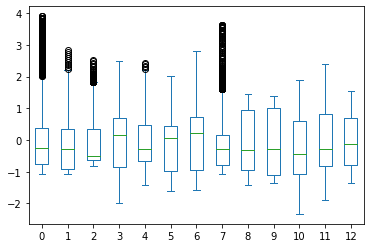

In [7]:
#Data Visualisation.
df_feat.plot(kind='box')
plt.show()

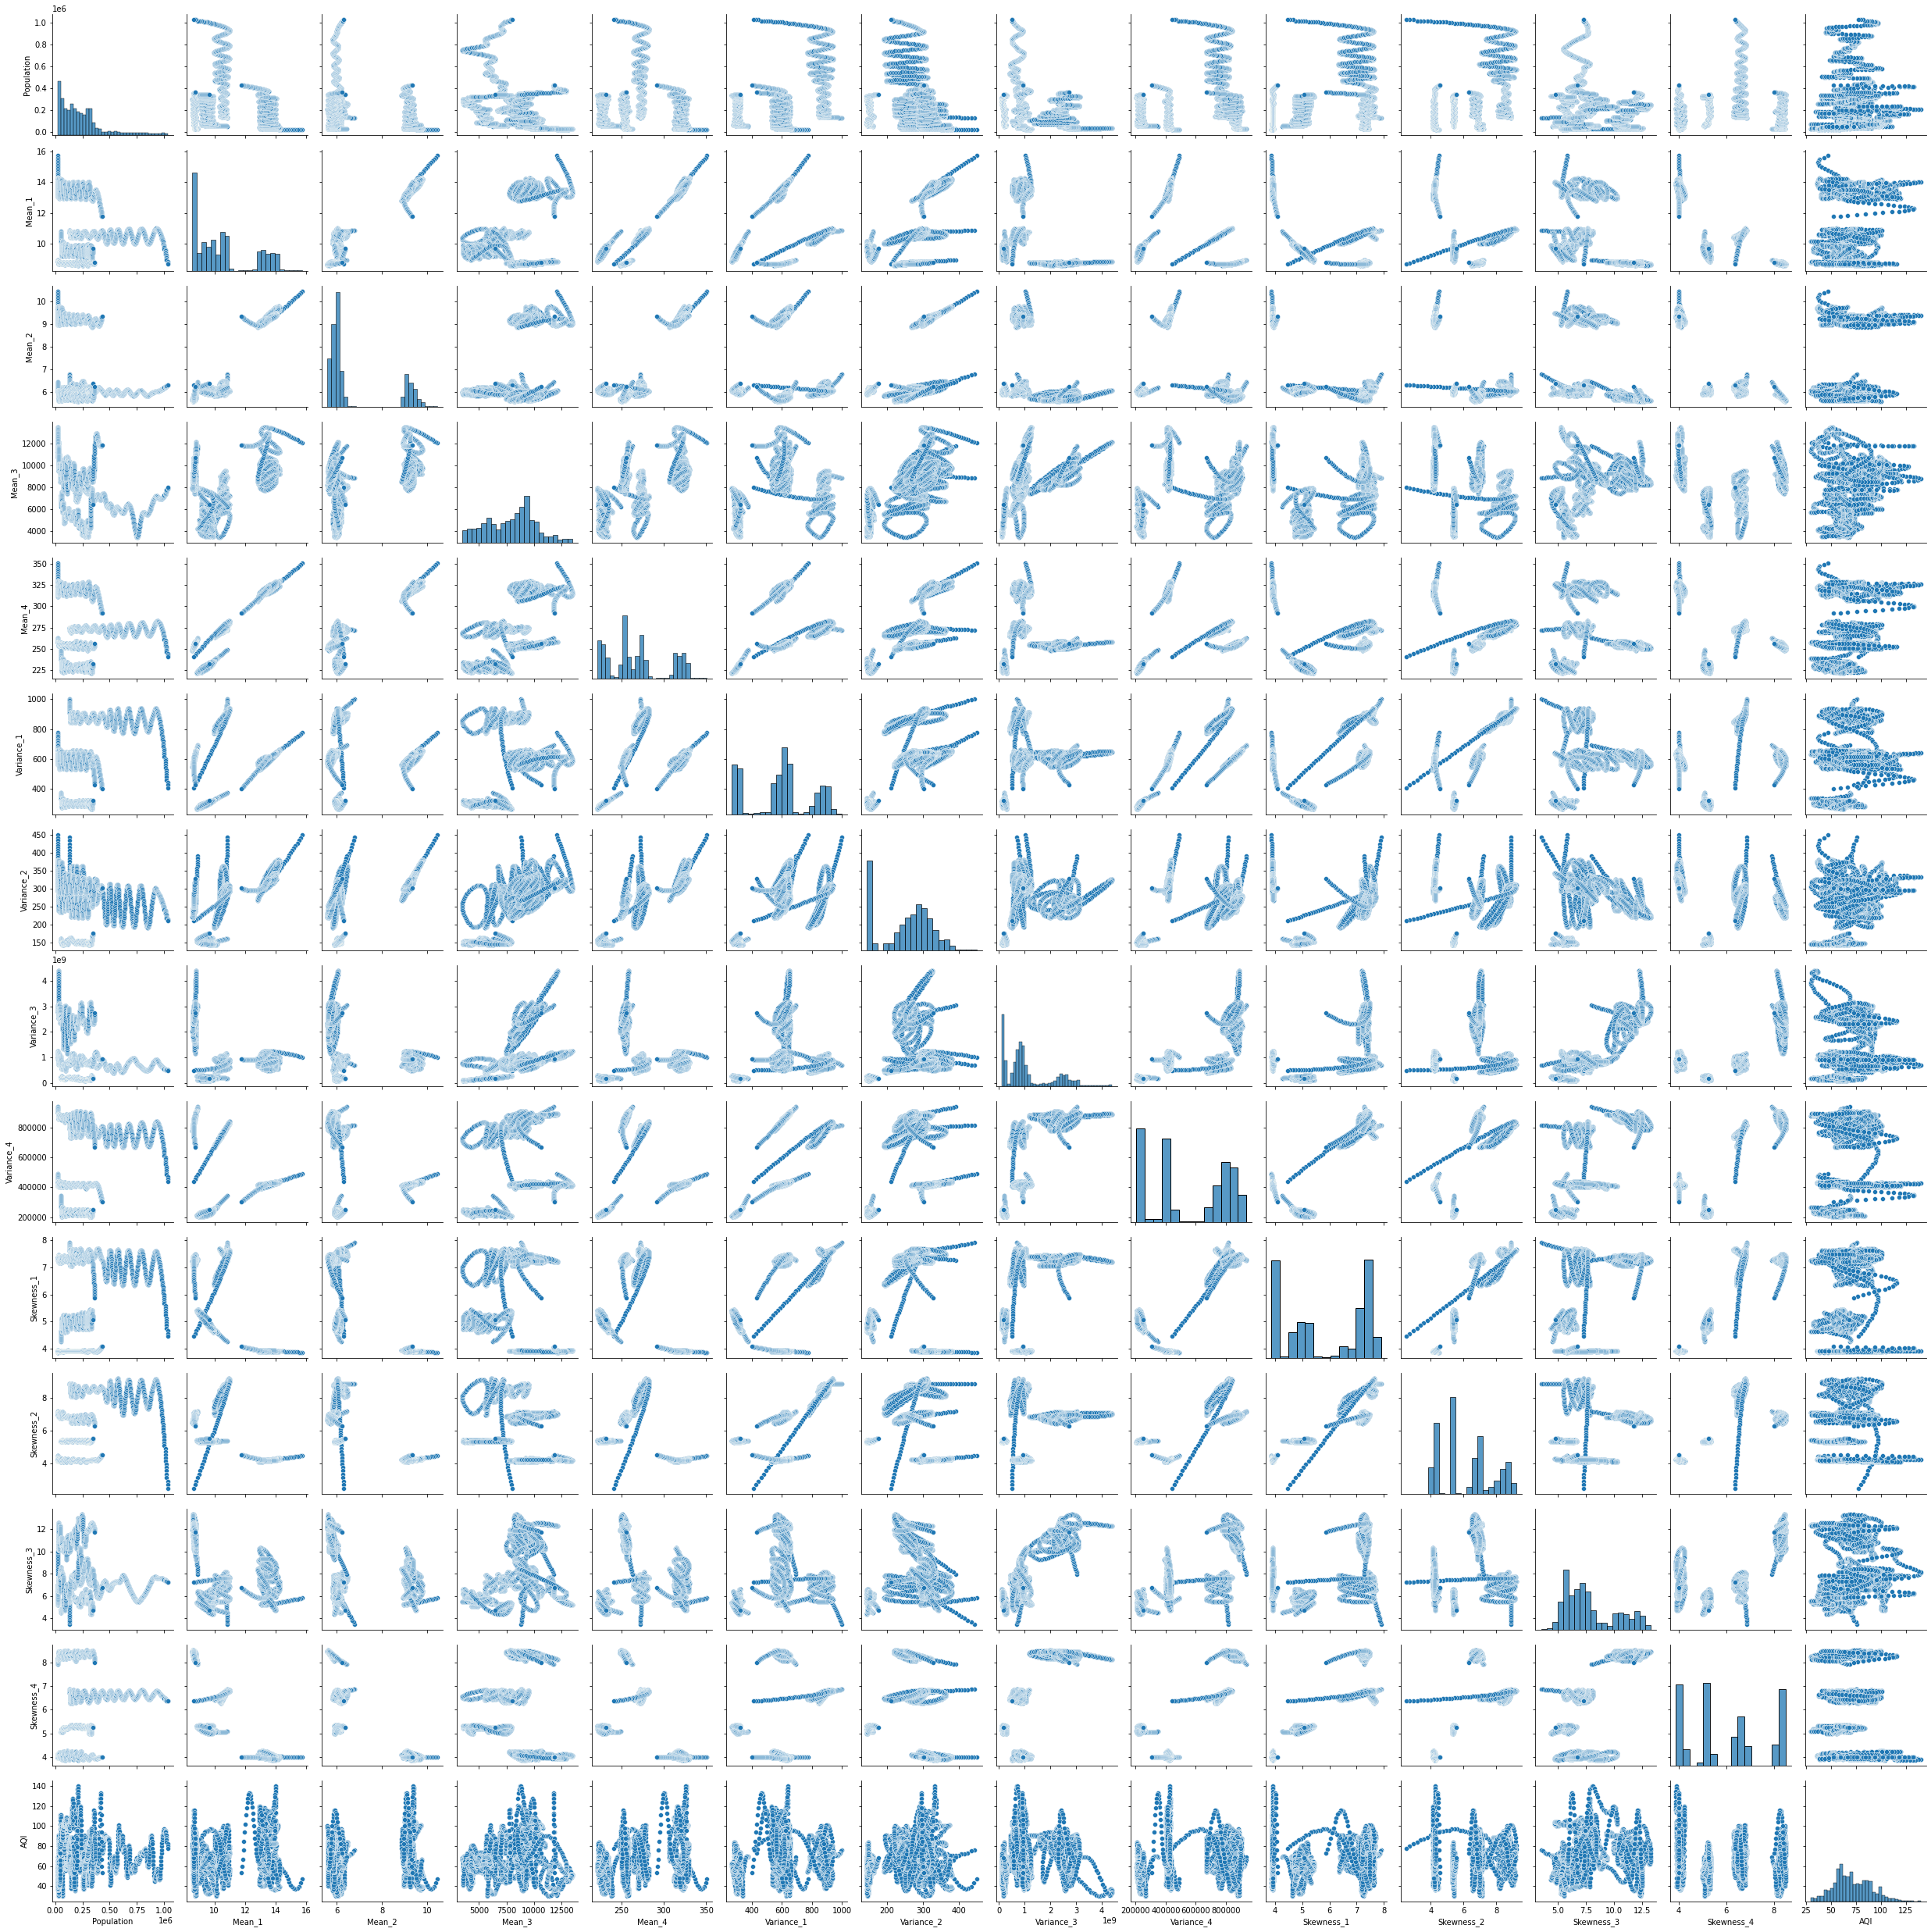

In [8]:
#Pairplot of the Dataset.
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Plot Between Features')

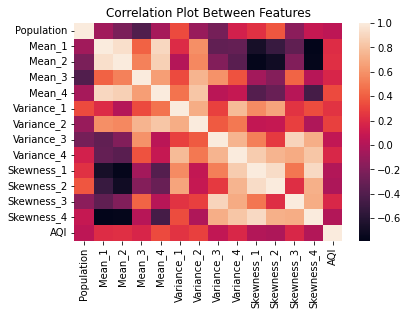

In [9]:
#Correlation between the features.
sns.heatmap(df.corr())
plt.title('Correlation Plot Between Features')

In [10]:
#Creating Empty arrays to store the RMSE, MAPE, MAE, MSE values of each model.

#MAE is the easiest to understand, because its the average error.
#MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
#MSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

RMSE=[];
MAPE=[];
MAE=[];
MSE=[];

In [11]:
#Defining a function to calculate RMSE, MAPE, MAE, MSE.
#Plotting the Scatter Plot and Distribution Plot.
def parameters(a,b):
    #Parameters.
    rmse = np.sqrt(metrics.mean_squared_error(a,b))
    mape = metrics.mean_absolute_percentage_error(a, b)
    mae = metrics.mean_absolute_error(a, b)
    mse = metrics.mean_squared_error(a, b)
    rmse = np.sqrt(metrics.mean_squared_error(a, b))
    
    RMSE.append(rmse)
    MAPE.append(mape)
    MSE.append(mse)
    MAE.append(mae)
    
    print('MAE: ',mae)
    print('MSE: ',mse)
    print('RMSE: ',rmse)
    print('MAPE: ',mape)
    
    #scatter plot between the predictions and the true values
    plt.scatter(a,b)
    plt.title('Scatter Plot')
    plt.show()
    
    #distribution plot 
    sns.distplot((a-b),bins=50)
    plt.title('Distribution Plot')
    plt.show()
    

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# load the data
# split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Population' , 'Mean_1', 'Mean_2','Mean_3','Mean_4','Variance_1','Variance_2','Variance_3','Variance_4','Skewness_1','Skewness_2','Skewness_3','Skewness_4']].values, df['AQI'].values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# reshape the input data to be 3-dimensional for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(150), input_shape=(1, 13)))
model.add(Dense(1))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# evaluate the model on the test set
loss = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', loss)

Epoch 1/100
71/71 [==============================] - 11s 37ms/step - loss: 5236.2036 - val_loss: 5194.9819
Epoch 2/100
71/71 [==============================] - 1s 8ms/step - loss: 4757.1812 - val_loss: 4724.2686
Epoch 3/100
71/71 [==============================] - 1s 11ms/step - loss: 4312.5923 - val_loss: 4287.3477
Epoch 4/100
71/71 [==============================] - 1s 9ms/step - loss: 3903.0999 - val_loss: 3884.3762
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 3526.7151 - val_loss: 3514.1162
Epoch 6/100
71/71 [==============================] - 1s 10ms/step - loss: 3182.2402 - val_loss: 3175.7964
Epoch 7/100
71/71 [==============================] - 1s 8ms/step - loss: 2864.8330 - val_loss: 2862.2258
Epoch 8/100
71/71 [==============================] - 1s 12ms/step - loss: 2576.0459 - val_loss: 2578.7109
Epoch 9/100
71/71 [==============================] - 1s 10ms/step - loss: 2314.3794 - val_loss: 2320.9861
Epoch 10/100
71/71 [============================

71/71 [==============================] - 1s 14ms/step - loss: 345.1377 - val_loss: 345.5977
Epoch 80/100
71/71 [==============================] - 1s 10ms/step - loss: 345.2658 - val_loss: 345.5445
Epoch 81/100
71/71 [==============================] - 0s 7ms/step - loss: 345.1330 - val_loss: 345.5214
Epoch 82/100
71/71 [==============================] - 1s 10ms/step - loss: 345.2689 - val_loss: 345.7247
Epoch 83/100
71/71 [==============================] - 1s 14ms/step - loss: 345.1803 - val_loss: 346.3185
Epoch 84/100
71/71 [==============================] - 1s 10ms/step - loss: 345.2997 - val_loss: 346.4162
Epoch 85/100
71/71 [==============================] - 1s 9ms/step - loss: 345.1316 - val_loss: 346.0310
Epoch 86/100
71/71 [==============================] - 1s 16ms/step - loss: 345.2366 - val_loss: 345.5666
Epoch 87/100
71/71 [==============================] - 1s 13ms/step - loss: 345.2000 - val_loss: 345.8554
Epoch 88/100
71/71 [==============================] - 1s 9ms/step - lo

In [13]:
#Prediction.
predictions = model.predict(X_test)

22/22 [==============================] - 1s 2ms/step


MAE:  14.972881855876231
MSE:  337.39834330150944
RMSE:  18.36840611761155
MAPE:  0.23066698360389362


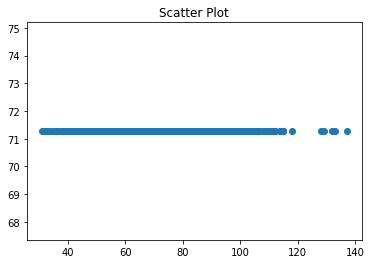

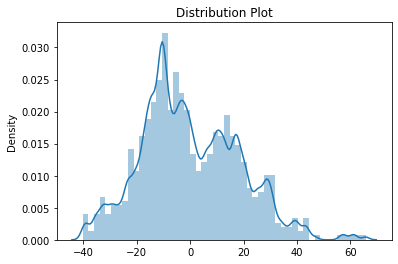

In [14]:
parameters(y_test,predictions)

In [15]:
# Test-Train Split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['AQI'],test_size=0.30)

In [16]:
#Importing LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#Fitting the LinearRegression Model
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
#Predictions.
predictions = lm.predict(X_test)

MAE:  12.766651060000864
MSE:  252.84387008314312
RMSE:  15.901065061282628
MAPE:  0.19413133764221652


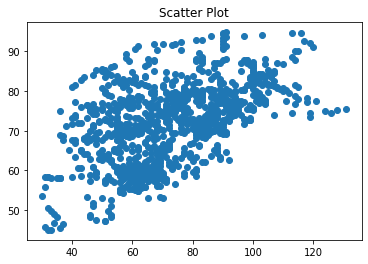

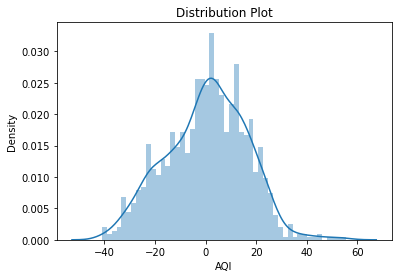

In [18]:
parameters(y_test,predictions)

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [20]:
predictions = regressor.predict(X_test)

MAE:  11.924145481550793
MSE:  237.9043716094876
RMSE:  15.424148975210516
MAPE:  0.18449780903943855


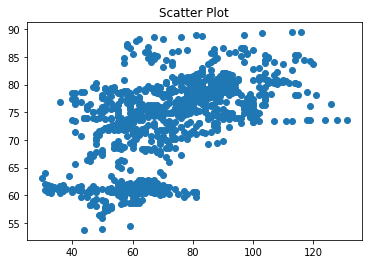

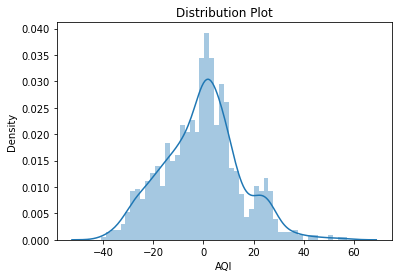

In [21]:
parameters(y_test,predictions)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=2, n_estimators=20,
                           random_state=0)

In [23]:
#Prediciton.
predictions = regressor.predict(X_test)

MAE:  11.924145481550793
MSE:  237.9043716094876
RMSE:  15.424148975210516
MAPE:  0.18449780903943855


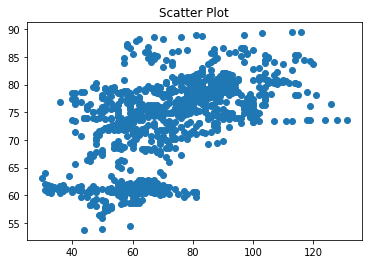

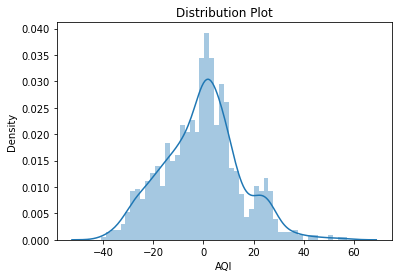

In [24]:
parameters(y_test,predictions)

In [25]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [26]:
predictions = regr.predict(X_test)

MAE:  11.202056405329827
MSE:  172.80659018655962
RMSE:  13.145592043972748
MAPE:  0.1686301313571568


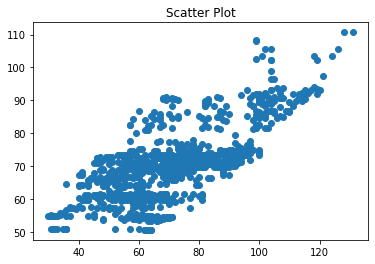

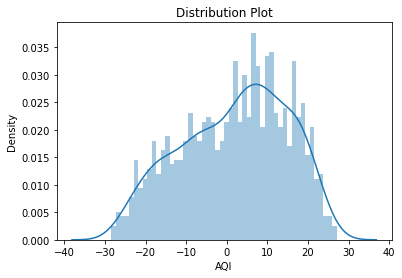

In [27]:
parameters(y_test,predictions)

In [28]:
#XGBoost.
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [29]:
# Fitting the model
xgb_r.fit(X_train, y_train)

[14:27:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [30]:
# Predict the model
predictions = xgb_r.predict(X_test)

MAE:  5.066041993550928
MSE:  44.114626136244695
RMSE:  6.641884230867374
MAPE:  0.0699885043216784


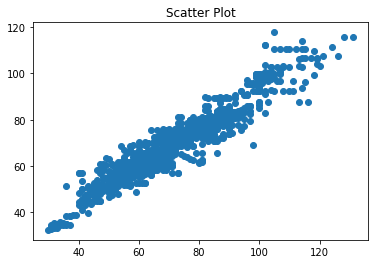

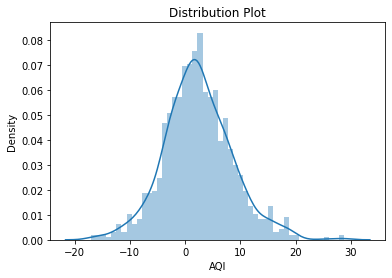

In [31]:
parameters(y_test,predictions)

In [32]:
#Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
predictions = dtree.predict(X_test)

MAE:  2.923003802281369
MSE:  47.25950570342205
RMSE:  6.874554945843553
MAPE:  0.04174640042281869


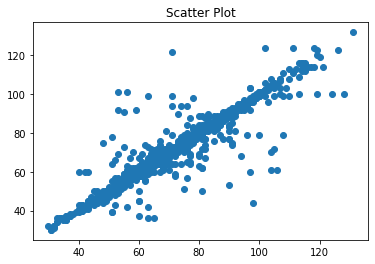

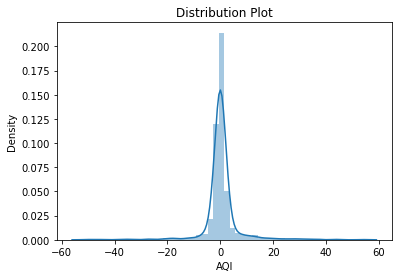

In [34]:
parameters(y_test,predictions)

In [35]:
#Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
predictions = rfc.predict(X_test)

MAE:  1.435361216730038
MSE:  8.039923954372624
RMSE:  2.8354759661073876
MAPE:  0.020655809586101692


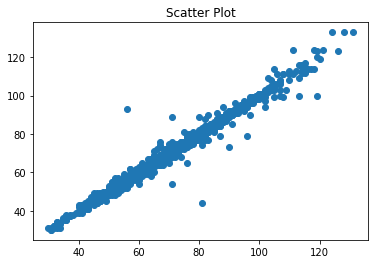

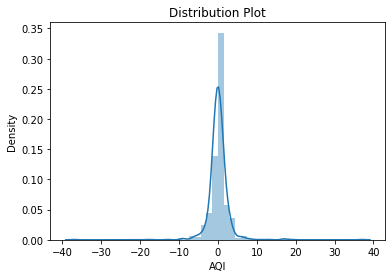

In [37]:
parameters(y_test,predictions)

In [38]:
#KNeighbours.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
predictions = knn.predict(X_test)

MAE:  1.3260456273764258
MSE:  4.769011406844107
RMSE:  2.1838066322007785
MAPE:  0.019098859156627037


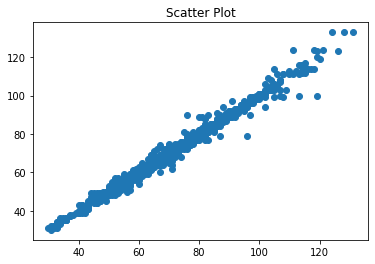

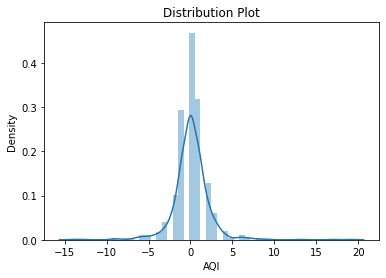

In [40]:
parameters(y_test,predictions)

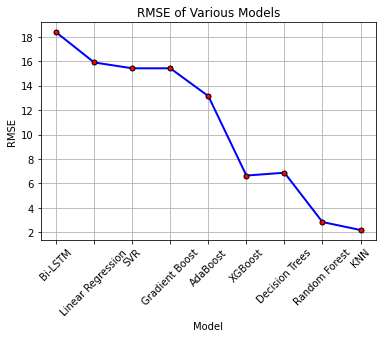

In [41]:
# RMSE Plotting.
plt.plot(RMSE, color='blue', marker='o', markersize=5, linewidth=2, markerfacecolor='red', markeredgecolor='black')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8],['Bi-LSTM','Linear Regression','SVR','Gradient Boost','AdaBoost','XGBoost','Decision Trees','Random Forest','KNN'],rotation=45)
plt.title('RMSE of Various Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.grid(True)
# Display the plot
plt.show()

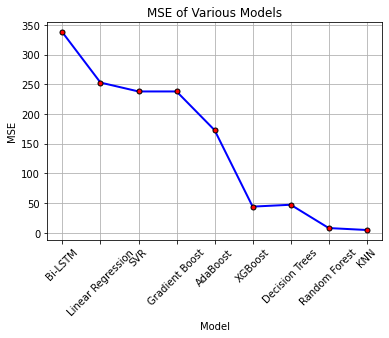

In [42]:
# MSE Plotting.
plt.plot(MSE, color='blue', marker='o', markersize=5, linewidth=2, markerfacecolor='red', markeredgecolor='black')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8],['Bi-LSTM','Linear Regression','SVR','Gradient Boost','AdaBoost','XGBoost','Decision Trees','Random Forest','KNN'],rotation=45)
plt.title('MSE of Various Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.grid(True)
# Display the plot
plt.show()

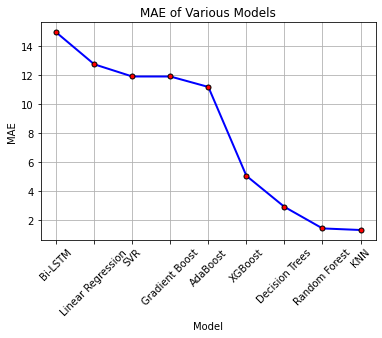

In [43]:
# MAE Plotting.
plt.plot(MAE, color='blue', marker='o', markersize=5, linewidth=2, markerfacecolor='red', markeredgecolor='black')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8],['Bi-LSTM','Linear Regression','SVR','Gradient Boost','AdaBoost','XGBoost','Decision Trees','Random Forest','KNN'],rotation=45)
plt.title('MAE of Various Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.grid(True)
# Display the plot
plt.show()

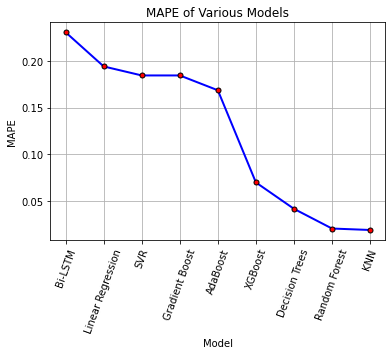

In [44]:
# MAPE Plotting.
plt.plot(MAPE, color='blue', marker='o', markersize=5, linewidth=2, markerfacecolor='red', markeredgecolor='black')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8],['Bi-LSTM','Linear Regression','SVR','Gradient Boost','AdaBoost','XGBoost','Decision Trees','Random Forest','KNN'],rotation=70)
plt.title('MAPE of Various Models')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.grid(True)
# Display the plot
plt.show()